<a href="https://colab.research.google.com/github/abrown12005/CMP_SC-4540-HW/blob/main/HW3/LogRegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This note book will cover the basic steps for performing a simplified version of Logistic Regression by 'hand'

Click "Run all" at the top for a complete run of the code

Start by Creating the data and importing packages

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

lineardata = np.array([[1,1,0],[2,2,0],[3,1,1],[4,2,1]])

Next we assign hyper-parameters and other constants, as well as symbols

In [ ]:
w1 = sp.Symbol('w1')
w2 = sp.Symbol('w2')
b = sp.Symbol('b')

d = lineardata
t = 'False'
min_stpsz = 0.01
max_stpcn = 100
learning_rate = 0.5
step_count = 0
CostFun = 0

Create the Log-Loss function using the Sigmoid function to compress the 'y' output as binary probabilities, as well as take the gradient to each weight and the bias

In [ ]:
for i in range(len(d)):
  CostFun += d[i,2]*sp.log((1/(1 + sp.exp(-(w1*d[i,0] + w2*d[i,1] + b))))) + (1-d[i,2])*sp.log(1-(1/(1 + sp.exp(-(w1*d[i,0] + w2*d[i,1] + b)))))
CostFun *= -1/len(d)

diCostFun_1 = sp.diff(CostFun,w1)
diCostFun_2 = sp.diff(CostFun,w2)
diCostFun_b = sp.diff(CostFun,b)

Now take a guess at each term and run the loop until the values all converge

In [ ]:
n_w1 = 0
n_w2 = 0
n_b = 0

while t != 'True':
  g_w1 = diCostFun_1.subs({w1:n_w1,w2:n_w2,b:n_b})
  g_w2 = diCostFun_2.subs({w1:n_w1,w2:n_w2,b:n_b})
  g_b = diCostFun_b.subs({w1:n_w1,w2:n_w2,b:n_b})

  w1_step = g_w1 * learning_rate
  w2_step = g_w2 * learning_rate
  b_step = g_b * learning_rate

  if abs(w1_step) <= min_stpsz and abs(w2_step) <= min_stpsz and abs(b_step) <= min_stpsz or step_count == max_stpcn:
    t = 'True'
    break
  else:
    n_w1 -= w1_step
    n_w2 -= w2_step
    n_b -= b_step
    step_count += 1

Finally create the Decision Boundary and graph everything together

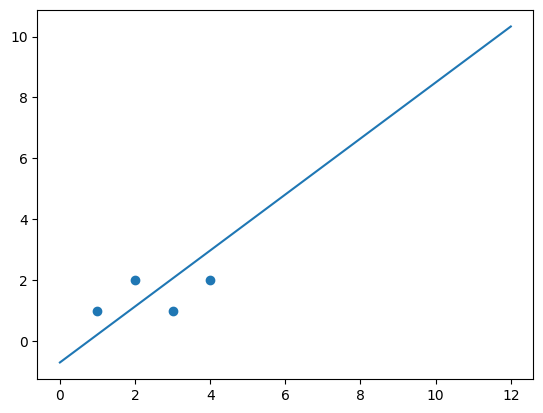

Final w1: 2.78051782297321
Final w2: -3.02751907286111
Final b: -2.09513617020258


In [ ]:
plt.scatter(d[:,0],d[:,1])
x = np.linspace(0,12,100)

u = (-n_w1 * x - n_b) / n_w2
plt.plot(x, u)

plt.show()

print(f"Final w1: {n_w1}")
print(f"Final w2: {n_w2}")
print(f"Final b: {n_b}")